<a href="https://colab.research.google.com/github/gabriellycristine1/PROJETO-MELANOMA/blob/main/PREDICT_MELANOMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTANDO BIBLIOTECAS 

In [1]:
from keras import models
from keras.preprocessing import image
import zipfile
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
from skimage.transform import resize
import tensorflow as tf
from google.colab import drive
!pip install -U efficientnet
import efficientnet.keras as efn
from efficientnet.tfkeras import EfficientNetB7

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 4.2 MB/s 


CONECTANDO O COLAB AO GOOGLE DRIVE PARA TER ACESSO AO DATASET DE IMAGENS

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


EXTRAINDO O ARQUIVO

In [3]:
path = '/content/drive/MyDrive/chest_orientation_model.zip'
zip_object = zipfile.ZipFile(file = path, mode='r')
zip_object.extractall('./')
zip_object.close()
path = '/content/drive/MyDrive/melanoma_cancer_dataset-20220802T172035Z-001.zip'
zip_object = zipfile.ZipFile(file = path, mode='r')
zip_object.extractall('./')
zip_object.close()

IMPORTANTO MODELO DA IA JA TREINADO

In [4]:
modelo = tf.keras.models.load_model('/content/chest_orientation_model.hdf5')

TRATAMENTO DE IMAGEM, ANTES DE SER MANDADO A IA

In [11]:
img = Image.open('/content/melanoma_cancer_dataset-20220802T172035Z-001/melanoma_cancer_dataset/test/malignant/melanoma_10123.jpg') #IMAGEM DE MELANOMA MALIGNO
img_np = np.array(img,'uint8')
img_np = np.expand_dims(img_np,axis=0)
img_np.shape

(1, 100, 100, 3)

PREVIÃO DA IA 

In [12]:
previsor = modelo.predict(img_np)
print(previsor)

[[0. 1.]]


TORCH USADO PARA PEGAR AS PORCENTAGEM DE CADA PREDIÇÃO

In [13]:
import torch

RETORNANDO AS PORCETAGENS E AS TRANSFORMADO-AS EM ARRAY NOVAMENTE

In [16]:
prev = torch.tensor(previsor)
novoPrev = torch.rand_like(prev, dtype=torch.float)
novoPrev = np.array(novoPrev)
print(novoPrev)

[[0.35406452 0.9443082 ]]


In [9]:
mal=novoPrev[0][1]
ben = novoPrev[0][0]

FUNÇÃO ARGMAX USADA PARA PEGAR O VALOR DE MAIOR PORCENTAGEM

MALIGNO
CHANCES DE SER BENIGNO: 80.54 %
CHANCES DE SER MALIGNO: 65.95 %


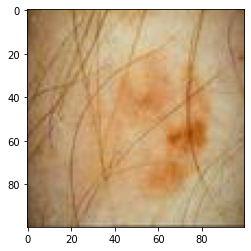

In [17]:
pred_class = np.argmax(novoPrev)
if pred_class == 0:
  print('BENIGNO')
elif pred_class == 1:
  print('MALIGNO')
plt.imshow(img)
porce_ben = ben*100
porce_mal = mal*100
print('='*32)
print('CHANCES DE SER BENIGNO:', '%.2f' % porce_ben,'%')
print('='*32,
      )
print('CHANCES DE SER MALIGNO:', '%.2f' %porce_mal,'%')

A IA OBTEVE ÊXITO NA PREDIÇÃO